# A Deep Neural Network to Recognize Handwritten Digits

In [13]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#Import and load data
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [15]:
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

In [16]:
data_shape = x_train.shape

print(f"There are {data_shape[0]} examples with shape ({data_shape[1]}, {data_shape[2]})")

There are 60000 examples with shape (28, 28)


Lets visualize a sample

LABEL: 3


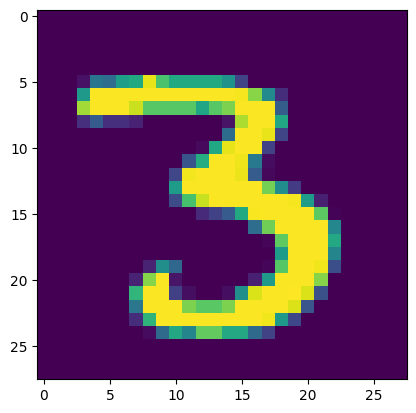

In [17]:
# Let's select a sample (0 to 59999)
index = 12

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label
print(f'LABEL: {y_train[index]}')

# Visualize the image
plt.imshow(x_train[index])

Defining our callback function to stop the training at 99% accuracy

In [19]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.99):
      print("\nReached 99% accuracy. Training Stopped!")
      self.model.stop_training = True

Defining our architecture

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callbacks = myCallback()
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2595 - accuracy: 0.9265
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1095 - accuracy: 0.9676
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0768 - accuracy: 0.9770
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0571 - accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0450 - accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0360 - accuracy: 0.9891
Epoch 7/10
1851/1875 [============================>.] - ETA: 0s - loss: 0.0287 - accuracy: 0.9910
Reached 99% accuracy. Training Stopped!
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0287 - accuracy: 0.9910


The model has successfully reached a training accuracy of 99%. Lets evaluate our model and test out predictions:

In [21]:
# Evaluate the model on unseen data
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Testset Loss :", test_loss)
print("Testset Accuracy :", test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0735 - accuracy: 0.9778
Testset Loss : 0.07353333383798599
Testset Accuracy : 0.9778000116348267


313/313 [==============================] - 0s 1ms/step
Predicted test label of image at index 56 : 4


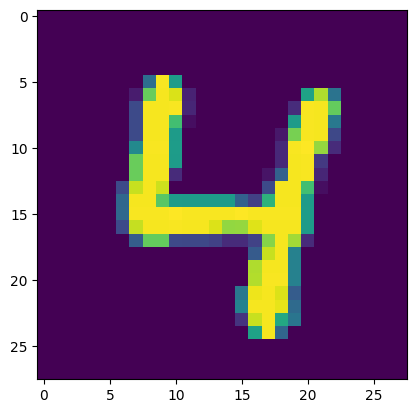

Predicted test label of image at index 18 : 3


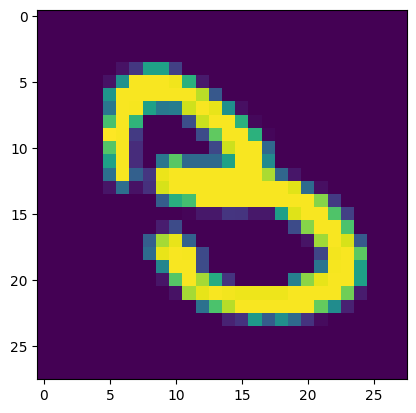

Predicted test label of image at index 91 : 6


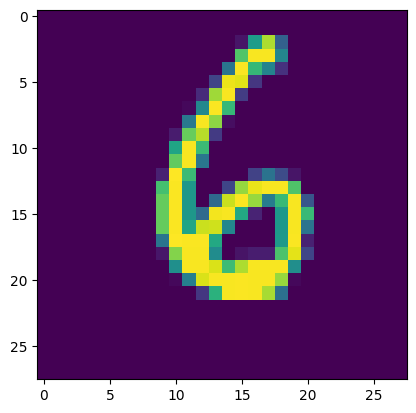

In [28]:
classifications = model.predict(x_test)

indices = [56, 18, 91]

for index in indices:
    print('Predicted test label of image at index', index, ':', y_test[index])
    plt.imshow(x_test[index])
    plt.show()

Above samples show that the model has predicted the handwritten numbers correctly.